# 01. Fundamental Statistics

In [1]:
# import
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import IPython

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()

print(
"""{}-{:02d}-{:02d} {:02d}:{:02d}:{:02d}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
----------------------
ipython\t\t{}"""
    .format(dt.year, dt.month, dt.day, 
            dt.hour, dt.minute, dt.second, 
            np.__version__, 
            scipy.__version__, 
            pd.__version__, 
            matplotlib.__version__, 
            IPython.__version__))

c = {'b': '#1f77b4', #blue
     'o': '#ff7f0e', #orange
     'g': '#2ca02c', #green
     'r': '#d62728', #red
     'v': '#9467bd', #violet
     'br': '#8c564b', #brown
     'p': '#e377c2', #pink
     'gr': '#7f7f7f', #grey
     'y': '#bcbd22', #yellow
     'c': '#17becf'} #cyan

2019-08-23 15:54:12
----------------------
numpy		1.14.3
scipy		1.1.0
pandas		0.24.1
matplotlib	3.0.0
----------------------
ipython		7.2.0


### 04.01. Two sample test

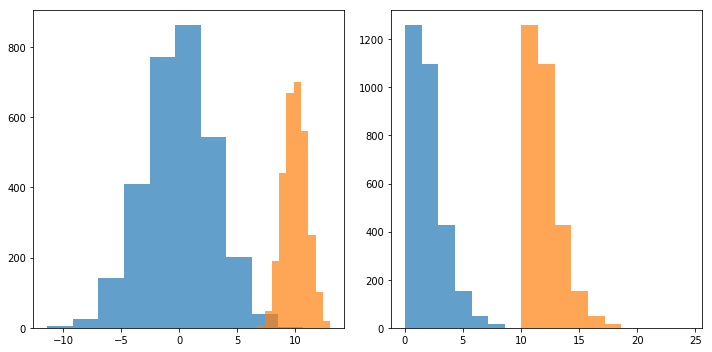

In [35]:
np.random.seed(123)

x0 = np.random.normal(loc=0.0, scale=3.0, size=3000)
x1 = np.random.normal(loc=10.0, scale=1.0, size=3000)

y0 = np.random.standard_gamma(shape=2.0, size=3000)
y1 = y0 + 10

fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
counts, bins = np.histogram(x1)

ax[0].hist(x0, alpha=.7)
ax[0].hist(x1, alpha=.7)
ax[1].hist(y0, alpha=.7)
ax[1].hist(y1, alpha=.7)
plt.tight_layout()
plt.savefig('fig/twosampletest.png')
plt.show()

In [25]:
from scipy import stats

stat, pvalue = stats.ttest_ind(x0, x1)
print("Welcht's\nt-statistic: {}, p-value: {}".format(stat, pvalue))

stat, pvalue = stats.mannwhitneyu(y0, y1)
print("Mann-Whitney\nt-statistic: {}, p-value: {}".format(stat, pvalue))
      
stat, pvalue = stats.wilcoxon(y0, y1)
print("Wilcoxon's\nt-statistic: {}, p-value: {}".format(stat, pvalue))

Welcht's
t-statistic: -394.46350253340927, p-value: 0.0
Mann-Whitney
t-statistic: 3532.0, p-value: 0.0
Wilcoxon's
t-statistic: 0.0, p-value: 0.0


### 04.02. More than 3 sample 

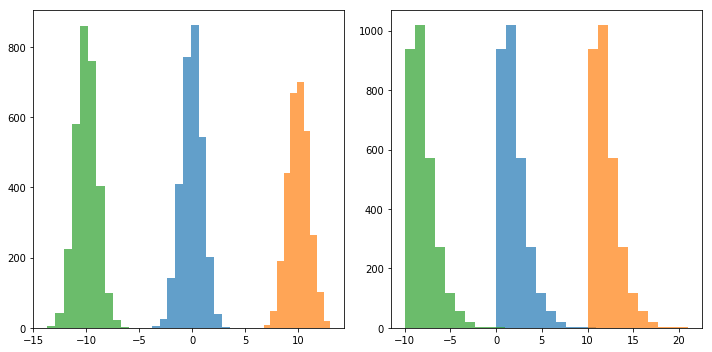

In [36]:
np.random.seed(123)

x0 = np.random.normal(loc=0.0, scale=1.0, size=3000)
x1 = np.random.normal(loc=10.0, scale=1.0, size=3000)
x2 = np.random.normal(loc=-10.0, scale=1.0, size=3000)

y0 = np.random.standard_gamma(shape=2.0, size=3000)
y1 = y0 + 10
y2 = y0 - 10

fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
counts, bins = np.histogram(x1)

ax[0].hist(x0, alpha=.7)
ax[0].hist(x1, alpha=.7)
ax[0].hist(x2, alpha=.7)

ax[1].hist(y0, alpha=.7)
ax[1].hist(y1, alpha=.7)
ax[1].hist(y2, alpha=.7)
plt.tight_layout()
# plt.savefig('fig/3sampletest.png')
plt.show()

In [37]:
stat, pvalue = stats.f_oneway(x0, x1, x2)
print("ANOVA\nt-statistics:{}, p-value: {}".format(stat, pvalue))

stat, pvalue = stats.kruskal(y0, y1, y2)
print("Krukal-Wallis test\nt-statistics: {}, p-value: {}".format(stat, pvalue))

ANOVA
t-statistics:302624.322366316, p-value: 0.0
Krukal-Wallis test
t-statistics: 7997.75852847175, p-value: 0.0
